In [ ]:
!pip install tensorflow

In [ ]:
#prepare the packages we need
import numpy as np

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report

In [ ]:
# Load CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# reduce the amount of data to a limit of 10k
n = 10000

train_images = train_images[:n]
train_labels = train_labels[:n]

In [ ]:
# check the shape of the data
train_images.shape

(10000, 32, 32, 3)

In [ ]:
train_images


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

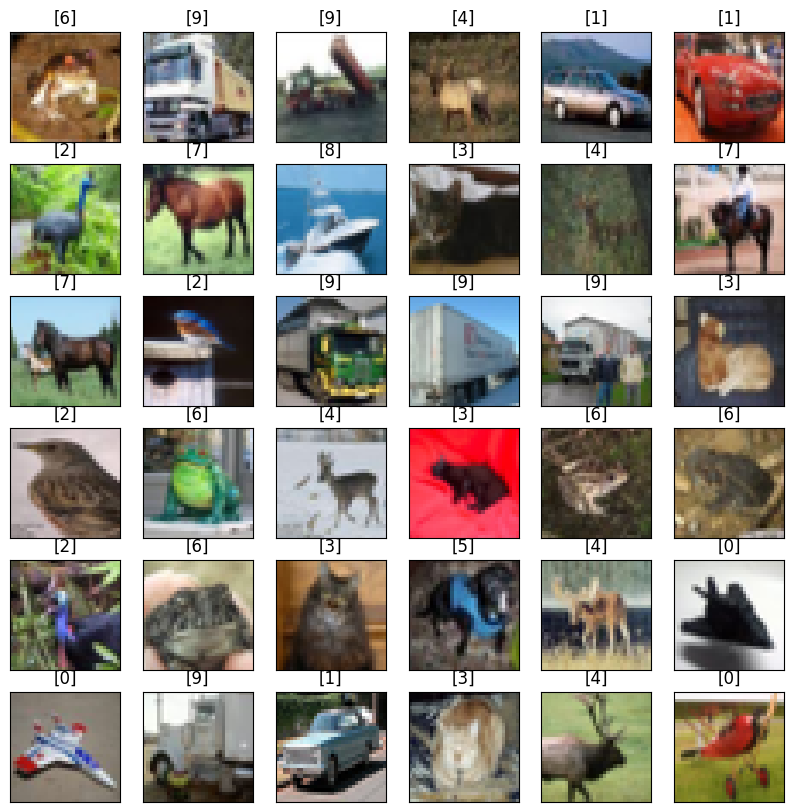

In [ ]:
# some samples
plt.figure(figsize=(10,10))

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
plt.show()

In [ ]:
# normalize the data
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

In [ ]:
# build the cnn model
cnn_model = Sequential([
            ResNet50(
            weights="imagenet",
            include_top=False, # exlude top
            input_shape=(32, 32, 3)), # input layer
            Dropout(0.2),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(256, activation='relu'),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(10, activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# freezing the base model option
cnn_model.layers[0].trainable = True

In [ ]:
# compiling the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

In [ ]:
# fit the model
history = cnn_model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=512,
    callbacks=[early_stopping], # this function will protect for overfitting
    verbose=1,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.2688 - loss: 2.0550 - val_accuracy: 0.1000 - val_loss: 5.9426
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.6492 - loss: 1.0467 - val_accuracy: 0.1000 - val_loss: 3.0351
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.7757 - loss: 0.6888 - val_accuracy: 0.1000 - val_loss: 3.6374
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8315 - loss: 0.5063 - val_accuracy: 0.1000 - val_loss: 2.7342
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.8842 - loss: 0.3682 - val_accuracy: 0.1000 - val_loss: 4.9935
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9218 - loss: 0.2717 - val_accuracy: 0.1000 - val_loss: 2.7090
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9286 - loss: 0.2416 - val_accuracy: 0.1000 - val_loss: 3.9739
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.9423 - loss: 0.1973 - val_accuracy: 0.10

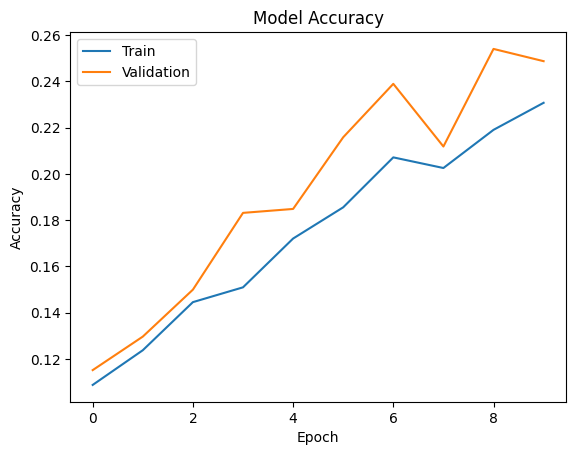

In [ ]:
# evaluate
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Train - Accuracy')

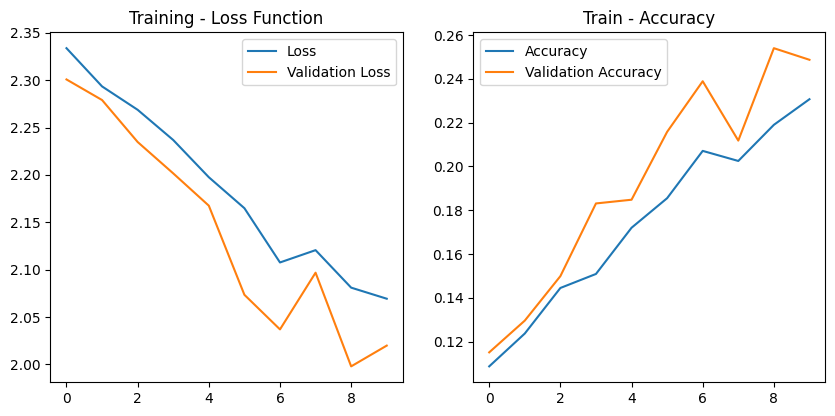

In [ ]:
# evaluate
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
# evaluate
score = cnn_model.evaluate(test_images, test_labels, verbose=0)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Test loss : 1.9979
Test accuracy : 0.2540


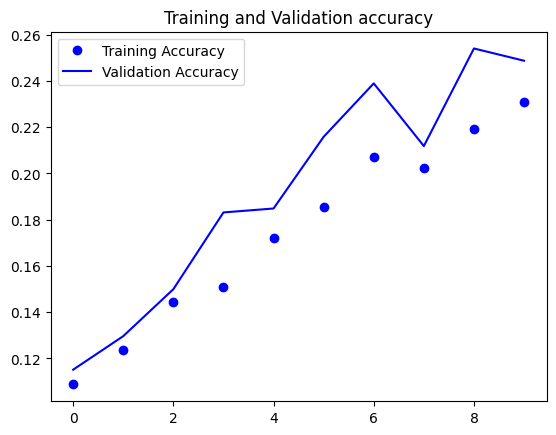

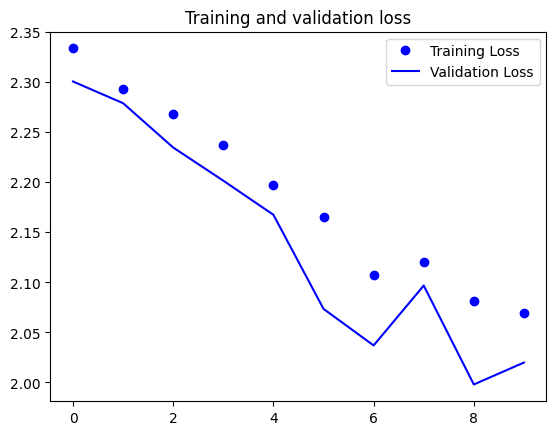

In [ ]:
# evaluate
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Calssification Report
y_pred = cnn_model.predict(test_images,verbose=0)
y_pred = np.argmax(y_pred,axis=1)

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.06      0.10      1000
           1       0.27      0.35      0.31      1000
           2       0.23      0.29      0.26      1000
           3       0.20      0.08      0.11      1000
           4       0.34      0.03      0.05      1000
           5       0.29      0.12      0.17      1000
           6       0.20      0.40      0.27      1000
           7       0.21      0.46      0.29      1000
           8       0.33      0.39      0.35      1000
           9       0.32      0.37      0.35      1000

    accuracy                           0.25     10000
   macro avg       0.29      0.25      0.23     10000
weighted avg       0.29      0.25      0.23     10000

